# Tweet Analysis for a twitter user

In [1]:
# Pandas, numpy
import numpy as np
import pandas as pd
pd.set_option("display.max_rows", None, "display.max_columns", None, "display.max_colwidth", None)

# Web Scraper
import GetOldTweets3 as got
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.patches as mpatches

# Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stoplist = stopwords.words('english')

# ML Models
from sklearn.linear_model import LinearRegression
from scipy import stats

# Tukey Test
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Other
import collections
import re
from datetime import datetime as dt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Rahul\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Set a user

In [2]:
username = 'realDonaldTrump'

# Getting the data for the twitter user

In [3]:
# Creation of query object
tweetCriteria = got.manager.TweetCriteria().setUsername(username).setSince("2016-01-01") 

# Creation of list that contains all tweets
tweets = got.manager.TweetManager.getTweets(tweetCriteria)

# Creating list of chosen tweet data
user_tweets = [[tweet.date, tweet.text, tweet.mentions, tweet.hashtags, tweet.favorites] for tweet in tweets]

# Creation of dataframe from tweets list
tweets_df = pd.DataFrame(user_tweets)
tweets_df.columns = ['Date', 'Tweet', 'Mentions', 'Hashtag', 'Likes']

# Save the data to a csv
tweets_df.to_csv('tweets_df.csv', index=False)

In [4]:
# Read the data from the csv
#tweets_df = pd.read_csv("tweets_df.csv", parse_dates=['Date'], keep_default_na=False)

# Show the tweets data
print("Number of tweets scraped: " + str(tweets_df.size))
print("Showing 10 most recent tweets")
tweets_df.head(10)

Number of tweets scraped: 88175
Showing 10 most recent tweets


,Date,Tweet,Mentions,Hashtag,Likes
0,2020-09-16 04:17:29+00:00,What is this all about?,,,43643
1,2020-09-16 04:15:52+00:00,Great!,,,12178
2,2020-09-16 01:49:22+00:00,It is STOPPED!,,,57256
3,2020-09-16 01:46:08+00:00,,,,18380
4,2020-09-15 23:27:33+00:00,"Great to be back in Philadelphia. Thank you Pennsylvania, see you again soon! #MAGA",,#MAGA,147697
5,2020-09-15 23:16:49+00:00,Tonight at 9:00 P.M. Enjoy!,,,35309
6,2020-09-15 21:01:20+00:00,"After decades of division and conflict, we mark the dawn of a new Middle East. Congratulations to the people of Israel, the people of the United Arab Emirates, and the people of the Kingdom of Bahrain. God Bless You All!",,,117347
7,2020-09-15 20:26:22+00:00,https://twitter.com/senategop/status/1305922237351034880,,,42519
8,2020-09-15 20:03:24+00:00,Happy National Hispanic Heritage Month!,,,50342
9,2020-09-15 18:31:41+00:00,,,,93099


# Generating word clouds for top mentions, hashtags, and words for the twitter user

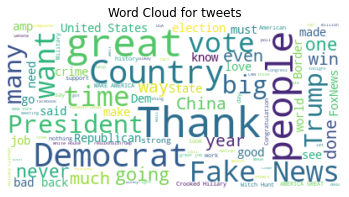

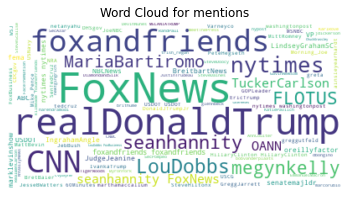

In [5]:
# Create a list of words to exlude (stopwords)
stopwords = set(STOPWORDS)
stopwords.update(["https", "wh", "gov", "WhiteHouse", "will", "today"]) #realDonaldTrump example
#stopwords.update(["https", "will", "today"]) # generic list
stopwords.update(stoplist) # add the stop list from nltk library as well

# Contants
max_word_count = 100

# Generate the word cloud for tweets
text = " ".join(tweet for tweet in tweets_df.Tweet)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=max_word_count, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for tweets')
plt.savefig('tweets_wordcloud.png')
plt.show()

# Generate the word cloud for mentions
text = " ".join(mentions for mentions in tweets_df.Mentions)
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=max_word_count, background_color="white").generate(text)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud for mentions')
plt.savefig('mentions_wordcloud.png')
plt.show()

# TODO: Fix duplicate hashtags in word cloud
# Generate the word cloud for hashtags
#text = " ".join(hashtag for hashtag in tweets_df.Hashtag)
#wordcloud = WordCloud(stopwords=stopwords, max_font_size=50, max_words=max_word_count, background_color="white").generate(text)
#plt.figure()
#plt.imshow(wordcloud, interpolation="bilinear")
#plt.axis("off")
#plt.title('Word Cloud for hashtags')
#plt.savefig('hashtags_wordcloud.png')
#plt.show()

# Generating bar charts for top mentions and hashtags

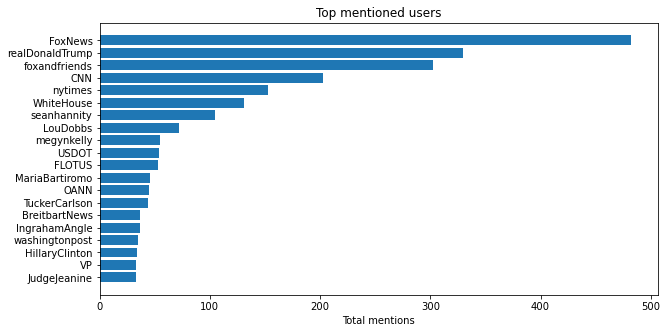

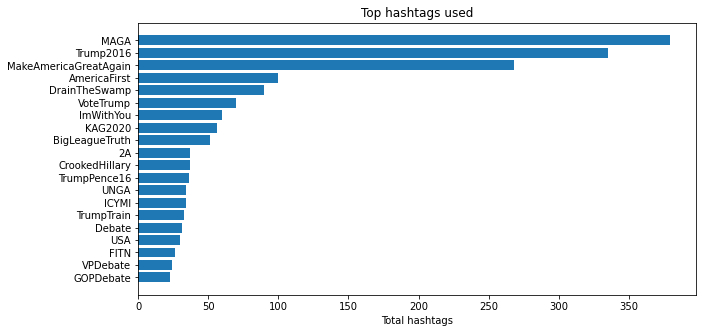

In [6]:
# Parameters
n = 20 # get the n most used mentions and hashtags

# Get the n most common mentions by the twitter user
text = " ".join(mentions for mentions in tweets_df.Mentions)
words = re.findall(r'\w+', text)
most_common = collections.Counter(words).most_common(n)

# Convert the list to a dataframe
user = [x[0] for x in most_common]
num_mentions = [x[1] for x in most_common]
top_mentions = pd.DataFrame(list(zip(user, num_mentions)), 
               columns =['User', 'Mentions']) 

# Plotting the data
fig = plt.figure()
fig.set_size_inches(10, 5)
new_plot = fig.add_subplot(1,1,1) # 1 row, 1 col, plot at index=1
new_plot.barh(top_mentions['User'], top_mentions['Mentions'])
plt.title('Top mentioned users')
plt.xlabel('Total mentions')
fig.gca().invert_yaxis() # sort in descending order
plt.savefig('top_mentioned_users.png')

# Get the n most common hashtags by the twitter user
text = " ".join(hashtag for hashtag in tweets_df.Hashtag)
words = re.findall(r'\w+', text)
most_common = collections.Counter(words).most_common(n)

# Convert the list to a dataframe
user = [x[0] for x in most_common]
num_mentions = [x[1] for x in most_common]
top_mentions = pd.DataFrame(list(zip(user, num_mentions)), 
               columns =['User', 'Hashtags']) 

# Plotting the data
fig = plt.figure()
fig.set_size_inches(10, 5)
new_plot = fig.add_subplot(1,1,1) # 1 row, 1 col, plot at index=1
new_plot.barh(top_mentions['User'], top_mentions['Hashtags'])
plt.title('Top hashtags used')
plt.xlabel('Total hashtags')
fig.gca().invert_yaxis() # sort in descending order
plt.savefig('top_used_hashtags.png')

# Generating graph of tweets per hour of the day and average likes per hour of day

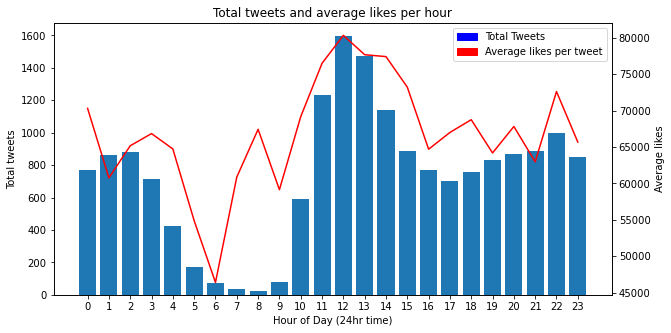

In [7]:
# Get the number of tweets per hour
tweets_per_hour = tweets_df.copy(deep=True)
tweets_per_hour['Date'] = tweets_per_hour['Date'].dt.hour
tweets_per_hour = tweets_per_hour.groupby(['Date']).count().reset_index()
tweets_per_hour = tweets_per_hour.drop(['Mentions', 'Hashtag', 'Likes'], axis=1)

# Get the average likes per hour
tweets_per_hour_like = tweets_df.copy(deep=True)
tweets_per_hour_like['Date'] = tweets_per_hour_like['Date'].dt.hour
tweets_per_hour_like = tweets_per_hour_like.drop(['Mentions', 'Hashtag', 'Tweet'], axis=1)
tweets_per_hour_like = tweets_per_hour_like.groupby(['Date']).agg({'Likes':'mean'}).reset_index()

# Plotting the graph
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 5)
ax2 = ax1.twinx()
curve1 = ax1.bar(tweets_per_hour['Date'], tweets_per_hour['Tweet'], align='center') # tweets per hour
curve2 = ax2.plot(tweets_per_hour_like['Date'], tweets_per_hour_like['Likes'], color='r') # average likes per hour

# Create the graphs
positions = (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23)
labels = ("0","1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23")
plt.xticks(positions, labels)

# Label graph, x-axis, and y-axis
ax1.set_ylabel("Total tweets")
ax1.set_xlabel("Hour of Day (24hr time)")
ax2.set_ylabel("Average likes")
plt.title('Total tweets and average likes per hour')
plt.xlabel('Hour of day (24hr time)')

# Create a legend
blue_patch = mpatches.Patch(color='blue', label='Total Tweets')
red_patch = mpatches.Patch(color='red', label='Average likes per tweet')
plt.legend(handles=[blue_patch, red_patch])
plt.savefig('total_tweets_average_likes.png')

# Plot the graph
plt.plot
plt.show()

# Is there a difference in the mean number of likes over the years?

All groups are normally distributed.
All groups have equal variance.
There is a difference in means between the years. Tukey Test will be performed.
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj     lower      upper    reject
-------------------------------------------------------------
  2016   2017 46760.9049  0.001  42850.9065 50670.9033   True
  2016   2018 50464.1235  0.001  46554.1251 54374.1219   True
  2016   2019 43792.7412  0.001  39882.7428 47702.7396   True
  2016   2020 79028.8034  0.001   75118.805 82938.8018   True
  2017   2018  3703.2187 0.0735   -206.7797  7613.2171  False
  2017   2019 -2968.1637 0.2328  -6878.1621   941.8347  False
  2017   2020 32267.8986  0.001  28357.9002 36177.8969   True
  2018   2019 -6671.3823  0.001 -10581.3807 -2761.3839   True
  2018   2020 28564.6799  0.001  24654.6815 32474.6783   True
  2019   2020 35236.0622  0.001  31326.0638 39146.0606   True
---------------------------------------------

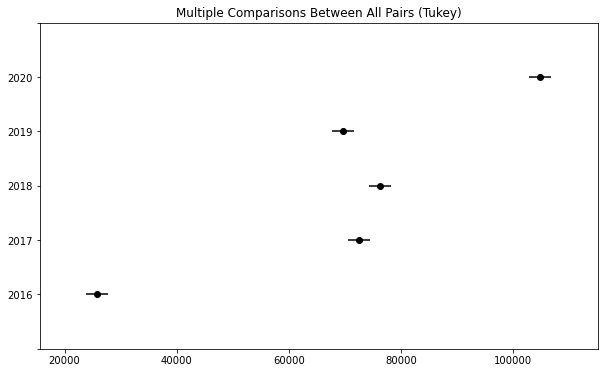

In [8]:
# Seperate data by year
tweets_per_day = tweets_df.copy(deep=True)
tweets_per_day['Year'] = tweets_per_day['Date'].apply(lambda x: x.year)
tweets_per_day = tweets_per_day.drop(columns = ['Date'])
twenty_sixteen = tweets_per_day[tweets_per_day.Year == 2016].dropna().reset_index().drop(columns='index').Likes
twenty_seventeen = tweets_per_day[tweets_per_day.Year == 2017].dropna().reset_index().drop(columns='index').Likes
twenty_eighteen = tweets_per_day[tweets_per_day.Year == 2018].dropna().reset_index().drop(columns='index').Likes
twenty_nineteen = tweets_per_day[tweets_per_day.Year == 2019].dropna().reset_index().drop(columns='index').Likes
twenty_twenty = tweets_per_day[tweets_per_day.Year == 2020].dropna().reset_index().drop(columns='index').Likes

# Determine how many tweets to get (since all the data for each year must be of equal size)
num_tweets = min(twenty_sixteen.size,twenty_seventeen.size,twenty_eighteen.size,twenty_nineteen.size,twenty_twenty.size)

# Get the first n tweets from the the four years
twenty_sixteen = twenty_sixteen.head(num_tweets)
twenty_seventeen = twenty_seventeen.head(num_tweets)
twenty_eighteen = twenty_eighteen.head(num_tweets)
twenty_nineteen = twenty_nineteen.head(num_tweets)
twenty_twenty = twenty_twenty.head(num_tweets)

# We will perform an ANOVA test to see if there is a differnce of means through the years
# alpha = 0.05
# First we must satisfy the conditions of ANOVA
    # 1. Observations independent and identically distributed (iid) [satisfied]
    # 2. Groups are normally distributed.
    # 3. Groups have equal variance.

# Checking for normality
alpha = 0.05
_, twenty_sixteen_p = stats.normaltest(twenty_sixteen)           
_, twenty_seventeen_p = stats.normaltest(twenty_seventeen)      
_, twenty_eighteen_p = stats.normaltest(twenty_eighteen)      
_, twenty_nineteen_p = stats.normaltest(twenty_nineteen)      
_, twenty_twenty_p = stats.normaltest(twenty_twenty)  
if twenty_sixteen_p < alpha and twenty_seventeen_p < alpha and twenty_eighteen_p < alpha and twenty_nineteen_p < alpha and twenty_twenty_p < alpha:
    print("All groups are normally distributed.")
else:
    print("All groups are not normally distributed.")

# Checking for equal vairances
levene_test = stats.levene(twenty_sixteen, twenty_seventeen, twenty_eighteen, twenty_nineteen, twenty_twenty).pvalue
if levene_test < alpha:
    print("All groups have equal variance.")
else:
    print("All groups do not have equal variance.")

# Perform the ANOVA test 
anova = stats.f_oneway(twenty_sixteen, twenty_seventeen, twenty_eighteen, twenty_nineteen, twenty_twenty)
anova_pvalue = anova.pvalue 
if anova_pvalue < alpha:
    print("There is a difference in means between the years. Tukey Test will be performed.")
else:
    print("There is no difference in means between the years. Tukey Test will be not performed.")
    
# Post Hoc Analysis (Tukeys HSD test)
if anova_pvalue < alpha and levene_test < alpha:
    x_data = pd.DataFrame({'2016':twenty_sixteen, '2017':twenty_seventeen, '2018':twenty_eighteen,
                           '2019': twenty_nineteen, '2020': twenty_twenty})
    x_melt = pd.melt(x_data)
    posthoc = pairwise_tukeyhsd(x_melt['value'], x_melt['variable'], alpha=0.05)#

    # Display the Tukey results
    fig = posthoc.plot_simultaneous()
    print(posthoc)

# Is the users average likes per post increasing over time?

Conclusion: Average likes per month are increasing.


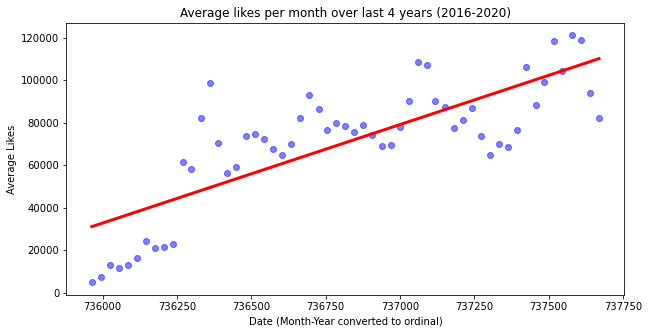

In [9]:
# Converts datetime to ordinal value
def convert_date_to_ordinal(date):
    d = dt.strptime(date, '%Y-%m').date()
    return d.toordinal()

# Calculate average likes per month
average_likes = tweets_df.copy(deep=True)
average_likes = average_likes.drop(columns = ['Tweet', 'Mentions', 'Hashtag'])
average_likes['Date'] = average_likes['Date'].apply(lambda x: x.strftime('%Y-%m'))
average_likes['Date'] = average_likes['Date'].apply(convert_date_to_ordinal)
average_likes = average_likes.groupby(['Date']).agg({'Likes':'mean'}).reset_index()

# Create the linear regression
fit = stats.linregress(average_likes['Date'], average_likes['Likes'])
average_likes['prediction'] = average_likes['Date']*fit.slope + fit.intercept

# Plotting the data
fig, ax1 = plt.subplots()
fig.set_size_inches(10, 5)
plt.plot(average_likes['Date'], average_likes['Likes'], 'bo', alpha=0.5)
plt.plot(average_likes['Date'], average_likes['prediction'], 'r-', linewidth=3)
plt.title('Average likes per month over last 4 years (2016-2020)')
plt.xlabel("Date (Month-Year converted to ordinal)")
plt.ylabel("Average Likes")

# Null Hypohtesis: There is no correaltion
# Alternative Hypohtesis: There is a correlation
# Alpha = 0.05
alpha = 0.05
regression_p = fit.pvalue
if regression_p < alpha and fit.slope > 0:
    print("Conclusion: Average likes per month are increasing.")
if regression_p < alpha and fit.slope < 0:
    print("Conclusion: Average likes per month are decreasing.")
if regression_p > alpha:
    print("Conclusion: There is no relation between average likes and time.")